In [1]:
%reload_ext autoreload

# Imports

import os
import sys
module_path = os.path.abspath(os.path.join('../image_gen_dm')) # or the path to your source code
sys.path.append(str(module_path))

import matplotlib.pyplot as plt
import pandas as pd

TF_ENABLE_ONEDNN_OPTS=0
os.environ['TF_ENABLE_ONEDNN_OPTS'] = str(TF_ENABLE_ONEDNN_OPTS)
os.environ['TG_GPU_ALLOCATOR'] = 'cuda_malloc_async'


In [2]:
FOLDER_PATH = 'res/histories'

files = os.listdir(FOLDER_PATH)


CD-VAE1 loss:  2588.340301513672
CD-VAE2 loss:  2585.2012939453125
CD-VAE3 loss:  2584.543785095215
CD-VAE4 loss:  2586.7699813842773
CD-VAE5 loss:  2585.244026184082
CD-VAE6 loss:  2585.8212966918945
CD-VAE7 loss:  2582.9590225219727
CD-VAE8 loss:  2583.472381591797
CD-VAE9 loss:  2582.3613204956055
CD-VAE10 loss:  2580.8203659057617
CD-VAE11 loss:  2580.8034591674805
CD-VAE12 loss:  2578.690444946289
CD-VAE13 loss:  2579.0943298339844
CD-VAE14 loss:  2577.7032012939453
CD-VAE15 loss:  2583.500198364258
CD-VAE16 loss:  2583.336784362793
CD-VAE17 loss:  2582.344886779785
CD-VAE18 loss:  2582.7763900756836
CD-VAE19 loss:  2582.137809753418
CD-VAE20 loss:  2583.1186447143555
CD-VAE21 loss:  2580.8183059692383
CD-VAE22 loss:  2580.869659423828
CD-VAE23 loss:  2579.999168395996
CD-VAE24 loss:  2580.6721267700195
CD-VAE25 loss:  2580.6512451171875
CD-VAE26 loss:  2578.9288177490234
CD-VAE27 loss:  2580.510322570801
CD-VAE28 loss:  2577.3263931274414


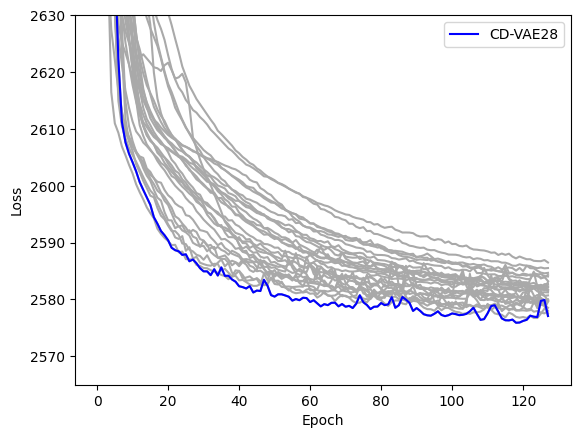

In [4]:
# Plot all histories from csv files in a directory

csv_files = [f for f in files if f.endswith('.csv')]

plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.ylim(2565, 2630)

i = 0
for f in csv_files:
    if f.startswith('ncvae'):
        continue

    if i < 28:
        df = pd.read_csv(os.path.join(FOLDER_PATH, f))
        
        df['loss_avg'] = df['loss'].rolling(window=32).mean()

        print(f'CD-VAE{i+1} loss: ', df['loss_avg'].iloc[-1])

        name = f[:-4]
        if i == 30:
            pass
        else:
            plt.plot(df['loss'], label=None, color='darkgray')
        #plt.plot(df['loss'], label=f'{name}')

    i += 1

df = pd.read_csv(os.path.join(FOLDER_PATH, 'cvae28.csv'))
plt.plot(df['loss'], label='CD-VAE28', color='blue')

plt.legend(loc="upper right")

plt.show()